In [0]:
import pandas as pd
data = pd.read_csv('nyc-bicycle-counts.csv')
data = data.loc[:29]
data.at[3,'Precipitation'] = '0.47'
data.at[21, 'Precipitation'] = '0'
data['Precipitation'] = data['Precipitation'].astype(float)
data.head()

,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,4/1/2016 0:00,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,1,4/2/2016 0:00,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922
2,2,4/3/2016 0:00,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759
3,3,4/4/2016 0:00,4/4/2016 0:00,44.1,33.1,0.47,521,1067,1440,1307,4335
4,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.00,1416,2617,3081,2357,9471


In [0]:
def bridge_name(a,b,c,d):
  m=max(a,b,c,d)
  if m==a:
    return 'Brooklyn Bridge'
  elif m==b:
    return 'Manhattan Bridge'
  elif m==c:
    return 'Williamsburg Bridge'
  elif m==d:
    return 'Queensboro Bridge'
  else:
    return 'wrong'

bridge_name(1,2,3,4)

'Queensboro Bridge'

In [0]:
data['bridge_name']=data.apply(lambda x:bridge_name(x['Brooklyn Bridge'], x['Manhattan Bridge'], x['Williamsburg Bridge'], x['Queensboro Bridge']),axis = 1)

In [0]:
data['bmean'] = data['Brooklyn Bridge']/data['Brooklyn Bridge'].mean()
data['mmean'] = data['Manhattan Bridge']/data['Manhattan Bridge'].mean()
data['wmean'] = data['Williamsburg Bridge']/data['Williamsburg Bridge'].mean()
data['qmean'] = data['Queensboro Bridge']/data['Queensboro Bridge'].mean()
data['bmedian'] = data['Brooklyn Bridge']/data['Brooklyn Bridge'].median()
data['mmedian'] = data['Manhattan Bridge']/data['Manhattan Bridge'].median()
data['wmedian'] = data['Williamsburg Bridge']/data['Williamsburg Bridge'].median()
data['qmedian'] = data['Queensboro Bridge']/data['Queensboro Bridge'].median()

In [0]:
data['bridge_name_mean'] = data.apply(lambda x:bridge_name(x['bmean'], x['mmean'], x['wmean'], x['qmean']),axis = 1)
data['bridge_name_median'] = data.apply(lambda x:bridge_name(x['bmedian'], x['mmedian'], x['wmedian'], x['qmedian']),axis = 1)

In [0]:
data['total_nor'] = (data['Total']-data['Total'].min())/(data['Total'].max()-data['Total'].min())

In [0]:
def pre(x):
  if x ==0:
    return 0
  else:
    return 1
data['Pre'] = data['Precipitation'].apply(lambda x:pre(x)) 

In [0]:
import datetime
def weekend(x):
  x=datetime.datetime.strptime(x,"%m/%d/%Y %H:%M")
  x = int(x.strftime("%d"))
  if x%7==2 or x%7==3:
    return 1
  else: 
    return 0
weekend('4/17/2016 0:00')

1

In [0]:
data['weekend'] = data['Date'].apply(lambda x:weekend(x))

In [0]:
data['average_temp'] = (data['High Temp (°F)']+data['Low Temp (°F)'])/2

In [0]:
data.head()

,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,bridge_name,bmean,mmean,wmean,qmean,bmedian,mmedian,wmedian,qmedian,bridge_name_mean,bridge_name_median,total_nor,Pre,weekend,average_temp
0,0,4/1/2016 0:00,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497,Williamsburg Bridge,0.750782,0.771941,0.846278,0.761140,0.716117,0.750540,0.792260,0.733966,Williamsburg Bridge,Williamsburg Bridge,0.377285,1,0,72.05
1,1,4/2/2016 0:00,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922,Williamsburg Bridge,0.364376,0.406467,0.527510,0.561907,0.347552,0.395198,0.493839,0.541846,Queensboro Bridge,Queensboro Bridge,0.136280,1,1,51.95
2,2,4/3/2016 0:00,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759,Williamsburg Bridge,0.231755,0.304233,0.348589,0.389517,0.221055,0.295798,0.326338,0.375611,Queensboro Bridge,Queensboro Bridge,0.022336,1,1,36.95
3,3,4/4/2016 0:00,4/4/2016 0:00,44.1,33.1,0.47,521,1067,1440,1307,4335,Williamsburg Bridge,0.229552,0.263487,0.296146,0.389816,0.218954,0.256182,0.277243,0.375899,Queensboro Bridge,Queensboro Bridge,0.000000,1,0,38.60
4,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.00,1416,2617,3081,2357,9471,Williamsburg Bridge,0.623889,0.646247,0.633629,0.702981,0.595083,0.628331,0.593184,0.677883,Queensboro Bridge,Queensboro Bridge,0.270558,0,0,34.10


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV

In [0]:
X = data[['High Temp (°F)','Low Temp (°F)','Precipitation','Pre','weekend','average_temp']]
y=data['bridge_name_mean']

In [0]:
X = data[['High Temp (°F)','Low Temp (°F)','Precipitation']]
y=data['bridge_name_mean']
p1 = np.linspace(0, 0.2, 100)
p2 = range(2,10)
p3 = range(2,20,1)
param_grid = {'min_impurity_decrease': p1, 'max_depth':p2,'min_samples_split':p3}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(X,y)
print("best_parms:{0}\nbest_score:{1}".format(clf.best_params_, clf.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


best_parms:{'max_depth': 3, 'min_impurity_decrease': 0.03636363636363636, 'min_samples_split': 2}
best_score:0.6


In [0]:
X = data[['High Temp (°F)','Low Temp (°F)','Precipitation']]
y=data['bridge_name_mean']
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)
dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)
dt.fit(X_train,y_train)
print("train score:", dt.score(X_train, y_train))
print("test score:", dt.score(X_test, y_test))

train score: 0.75
test score: 0.6666666666666666


In [0]:
import pydotplus 
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True

In [0]:
dt.feature_importances_

array([0.24721485, 0.55953013, 0.19325502])

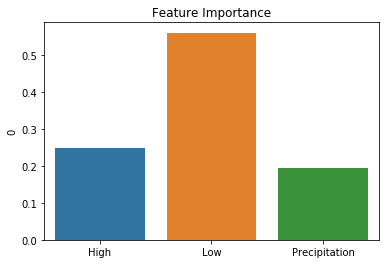

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
dic = {'High':[0.24721485],'Low':[0.55953013],'Precipitation':[0.19325502]}
dic = pd.DataFrame(dic)
sns.barplot(x=dic.columns,y=dic.iloc[0,:])
plt.title('Feature Importance')
plt.savefig('importance')

In [0]:
dt.classes_

array(['Brooklyn Bridge', 'Manhattan Bridge', 'Queensboro Bridge',
       'Williamsburg Bridge'], dtype=object)